

# Ejercicios



## Ejercicio 1



Utilizar `plt.subplot()` para crear una figura con una filas y dos columnas.

En el primer subplot hacer un diagrama de barras para cada una de las variables. La altura que tomarán es la media de los valores de cada una de las variables.

En el segundo subplot hacer un scatterplot en el que, en negro y con una opacidad de 0.5, aparezcan los datos de 'jumps' frente a 'chins' y en el que también, con la misma opacidad pero en naranja, aparezcan los datos de 'situps' en frente a 'chins'. Crea una leyendo con el nombre correspondiente de las variables usadas. 



Para cargar el dataset correctamente:

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_linnerud

dataset = load_linnerud()

df = pd.DataFrame(data = dataset.data, columns=[value.strip().lower().replace(' ', '_') for value in dataset.feature_names]) 

In [31]:
df.mean()

chins       9.45
situps    145.55
jumps      70.30
dtype: float64

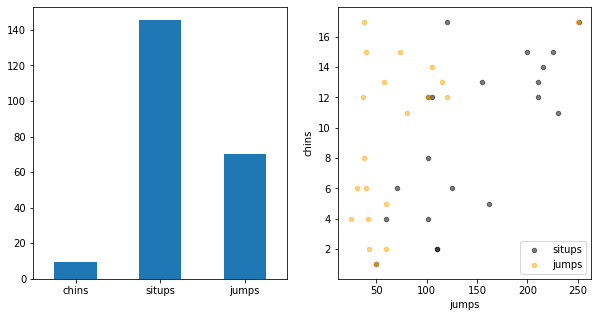

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plt1
df.mean().plot.bar(ax=ax1, rot=0)

# plt2
df.plot.scatter(x='situps', y='chins', color='black', alpha=.5, label='situps', ax=ax2)
df.plot.scatter(x='jumps', y='chins', color='orange', alpha=.5, label='jumps', ax=ax2)
#ax2.xaxis.set_label('TEST')
plt.legend()
plt.show()



## Ejercicio 2



Cree una figura final de dimensiones 12 x 9 y  emplee el estilo 'seaborn-paper'.

Utilizar `plt.subplot()` para crear una figura con tres filas y una sola columna.

En el primer subplot hacer histogramas para las variables 'worst_area' y 'area_error' en azul y rojo respectivamente e incluir leyenda con el mismo nombre de las variables. Ponemos bins fijos de 0 a 4000 con saltos de 100.

En el segundo subplot hacer un scatterplot con puntos verdes de 'mean_symmetry' frente a 'mean_concavity' con el título 'scatterplot1' y con los nombres de las variables en los ejes.

En el tercer y últmo subplot hacer un plot de 'mean_area' en función de 'mean_radius'. Anotar donde se encuentra el valor máximo de 'mean_area' con 'max' y la mediana de 'mean_radius' con 'median'. Antes se deberán ordenar los datos del dataset por 'mean_area'.

Asegurarse que los distintos subplots no se sobreponen.

In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

df = pd.DataFrame(data = dataset.data, columns=[value.strip().replace(' ', '_') for value in dataset.feature_names])

In [52]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


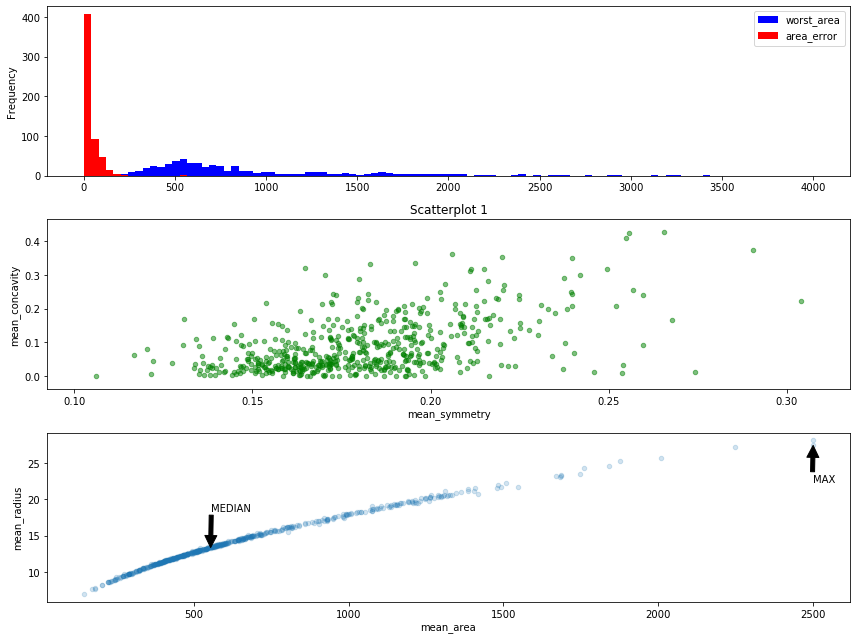

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 9))

# Plot 1
df[['worst_area', 'area_error']].plot.hist(color=['blue', 'red'], 
                                           bins=np.linspace(0, 4000, 100), 
                                           ax=ax1)

# Plot 2
df.plot.scatter(x='mean_symmetry', y='mean_concavity', color='green', alpha=.5, ax=ax2)
ax2.set_title('Scatterplot 1')

# Plot 3
df.sort_values('mean_area').plot.scatter(x='mean_area', y='mean_radius', ax=ax3, alpha=.2)

# Max mean_area
max_mean_area_x = df.mean_area.max()
max_mean_area_y = df.mean_radius[df.mean_area.idxmax()]
ax3.annotate('MAX', xy=(max_mean_area_x, max_mean_area_y), 
             xytext=(max_mean_area_x-2, max_mean_area_y-5), 
             arrowprops={'color':'black'})

# Median mean radius
med_mean_radius_y = df.mean_radius.median()
med_mean_radius_x = df.mean_area[df.mean_radius == med_mean_radius_y].values[0]
ax3.annotate('MEDIAN', xy=(med_mean_radius_x, med_mean_radius_y), 
             xytext=(med_mean_radius_x+2, med_mean_radius_y+5), 
             arrowprops={'color':'black'})

fig.tight_layout()
plt.show()



## Ejercicio 3



Muestra un gráfico de barras horizontal de la popularidad de los lenguajes de programación. Defina el ancho de cada barra según el tiempo requerido para dominar los conceptos básicos del lenguaje y muestre los idiomas ordenados por popularidad.

Muestra de datos:

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.DataFrame({'language': ['JavaScript', 'Java', 'C++', 'C#', 'Python', 'PHP'],
                   'popularity': [8, 22.2, 6.7, 7.7, 17.6, 8.8],
                   'time_to_master': [9, 12.5, 10, 8, 5, 7.8]})

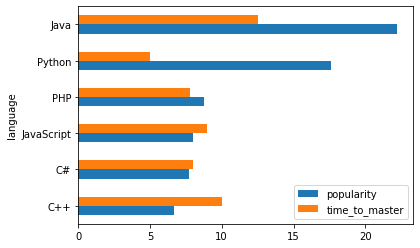

In [82]:
df.set_index('language').sort_values('popularity').plot.barh()
plt.show()



## Ejercicio 4 (Opcional)



Reproduce la figura del cuarteto de Anscombe. A continuación tienes los datos con los que representarlo.
<img src="img/anscombe.png"></img>

Extraído de https://matplotlib.org/gallery/specialty_plots/anscombe.html#sphx-glr-gallery-specialty-plots-anscombe-py

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

def fit(x):
    return 3 + 0.5 * x

In [ ]:
# Respuesta aqui